In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import csv
import random

In [2]:
input_filename = 'text_file.txt'


def get_words_from_file(input_filename):
    f = open(input_filename,"r")
    buffer = f.read()
    words = buffer.split(' ')
    word_dict = {}
    word_list = []
    i = 0
    for word in words:
        if(not word_dict.__contains__(word)):
            word_dict[word] = i
            word_list.append(word)
            i += 1


    return word_dict, word_list

In [3]:
def get_n_words_random(word_list, n):
    random_index = random.randrange(1, len(word_list) -  n - 1)
    return np.array(range(random_index - 1,random_index + n - 1)), np.array(range(random_index + n - 1,random_index + n))

def get_n_words(word_list, start_index, n):
    random_index = start_index
    return np.array(range(random_index - 1,random_index + n - 1)), np.array(range(random_index + n - 1,random_index + n))

def get_training_data(word_list):
    train_x = []
    train_y = []
    for i in range(len(word_list)/batch_size):
        x, y = get_n_words(word_list, i*batch_size, n_steps)
        train_x.append(x)
        train_y.append(y)
    return np.array(train_x), np.array(train_y)


words_dict, words_list = get_words_from_file(input_filename)

In [4]:
n_inputs = 1
n_steps = 5
n_neurons = 512
n_outputs = 1
n_layers = 3
learning_rate = 0.001


X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None])
#cell = tf.contrib.rnn.BasicLSTMCell(n_neurons, forget_bias=1.0)
layers = [tf.contrib.rnn.BasicLSTMCell(n_neurons, forget_bias=1.0) for layer in range(n_layers)]
cell = tf.contrib.rnn.MultiRNNCell(layers)
output_cell = tf.contrib.rnn.OutputProjectionWrapper(cell, output_size = n_outputs)
outputs , states = tf.nn.dynamic_rnn(output_cell, X, dtype= tf.float32)
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
#optimizer = tf.train.RMSPropOptimizer(0.1, 0.9, 0.01)
training_op = optimizer.minimize(loss)
#correct = tf.nn.in_top_k(logits, y, 1)
#accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [6]:
def test(sess, outputs):
    random_index = 150
    num_of_words_to_predict = 5
    number_of_words_to_generate = 50
    x_new = np.array(range(random_index,random_index + num_of_words_to_predict + number_of_words_to_generate))
    result = "\n"
    truth_indices = []
    for index in x_new:
        result += (words_list[index]) + " "
        truth_indices.append(index)
        if(index == random_index + num_of_words_to_predict):
            result += ' |<-Input. Truth ->| '
    predicted_result = ''
    match_count = 0
    for i in range(number_of_words_to_generate):
        x_new = np.array(range(random_index + i,random_index + i + num_of_words_to_predict))
        batch_x = x_new.reshape((-1,n_steps,n_inputs))
        y_pred = sess.run(outputs, feed_dict={X: batch_x})
        word_index = int(y_pred.max())
        predicted_result += (words_list[word_index]) + " "
        if(word_index == truth_indices[i + num_of_words_to_predict]):
            match_count += 1
    print("Accuracy:", (match_count/float(number_of_words_to_generate)) * 100)
    print(result)
    print("\n\n\nPredicted words:")
    print(predicted_result)
    

In [7]:
n_iterations = 50000
batch_size = 50
batches = 50
learning_rate = 0.01


init = tf.global_variables_initializer()
loss_track = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_iterations):
        for i in range((len(words_list) - n_steps)/batch_size):
            batch_x, batch_y = get_n_words(words_list, i*batch_size, n_steps)
            batch_y =  batch_y.reshape((-1))
            batch_x = batch_x.reshape((-1,n_steps,n_inputs))
            sess.run(training_op, feed_dict={X: batch_x, y: batch_y})
        if epoch % 5000 == 0:
            print "Epoch:", epoch
            mse = loss.eval(feed_dict={X: batch_x,y: batch_y})
            loss_track.append(mse)
            print ("Iter " + str(epoch) + ", Minibatch Loss= " + \
                    "{}".format(mse) )
            test(sess, outputs)
 
            

Epoch: 0
Iter 0, Minibatch Loss= 453662.5
('Accuracy:', 0.0)

meeting or exceeding all objectives greatly  |<-Input. Truth ->| enhancing flexibility chairman chief executive richard parsons projecting operating earnings growth around expects revenue wider margins accounts as part efforts resolve an inquiry into market regulators already offered pay settle charges deal under review unable estimate amount needed set aside legal reserves previously intends adjust way with german music 



Predicted words:
benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited benefited be

('Accuracy:', 0.0)

meeting or exceeding all objectives greatly  |<-Input. Truth ->| enhancing flexibility chairman chief executive richard parsons projecting operating earnings growth around expects revenue wider margins accounts as part efforts resolve an inquiry into market regulators already offered pay settle charges deal under review unable estimate amount needed set aside legal reserves previously intends adjust way with german music 



Predicted words:
as part efforts resolve inquiry into market regulators offered pay settle charges under review unable estimate needed reserves intends intends adjust way way with german music publisher bertelsmann's purchase stake europe reported book sale loss value dollar hit highest level against euro almost after federal reserve reserve head trade deficit 


*Comments* - This code takes a lot of time to run, and tuning it for accuracy is challenging, since even if one word is out of sync, the index based accuracy calculation goes for a toss. I evaluated the quality of the prediction based on how the text reads. The code takes a lot of time to run for 50000 iterations on my machine since its a 5 year old laptop. But the text generated somewhat makes sense, even if not precisely correct.

Also, the plot below shows the loss going down with each iteration.

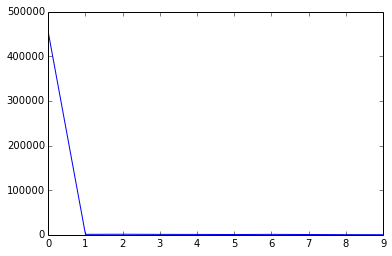

In [8]:
            
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)